In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [120]:
df = pd.read_csv('data/gym_churn_us.csv')

In [121]:
df.head().T

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
Near_Location,1.000000,1.000000,1.000000,1.000000,1.000000
Partner,1.000000,0.000000,1.000000,1.000000,1.000000
Promo_friends,1.000000,0.000000,0.000000,1.000000,1.000000
Phone,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,6.000000,12.000000,1.000000,12.000000,1.000000
Group_visits,1.000000,1.000000,0.000000,1.000000,0.000000
Age,29.000000,31.000000,28.000000,33.000000,26.000000
Avg_additional_charges_total,14.227470,113.202938,129.448479,62.669863,198.362265
Month_to_end_contract,5.000000,12.000000,1.000000,12.000000,1.000000


In [122]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [124]:
# checking null values
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [125]:
# checking duplicates
df.duplicated().sum()

0

# **Exploratory data analysis (EDA)**

In [126]:
def barplotsColumns(autos,nLower = 2,nUpper = 100):
    nColumns = 3
    autos = autos[[col for col in autos if autos.nunique()[col] > nLower and autos.nunique()[col] < nUpper]] 
    _, nCol = autos.shape
    nGraphRow = (nCol + nColumns - 1) / nColumns
    fig = plt.figure(num = None, figsize = (7 * 6, int(4 * nGraphRow)), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(nCol):
        plt.subplot(int(nGraphRow), nColumns, i + 1)
        columnDf = autos.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Counts')
        plt.title('{}'.format(list(autos)[i]))
        
    fig.savefig('high_view.jpg')

    plt.show()

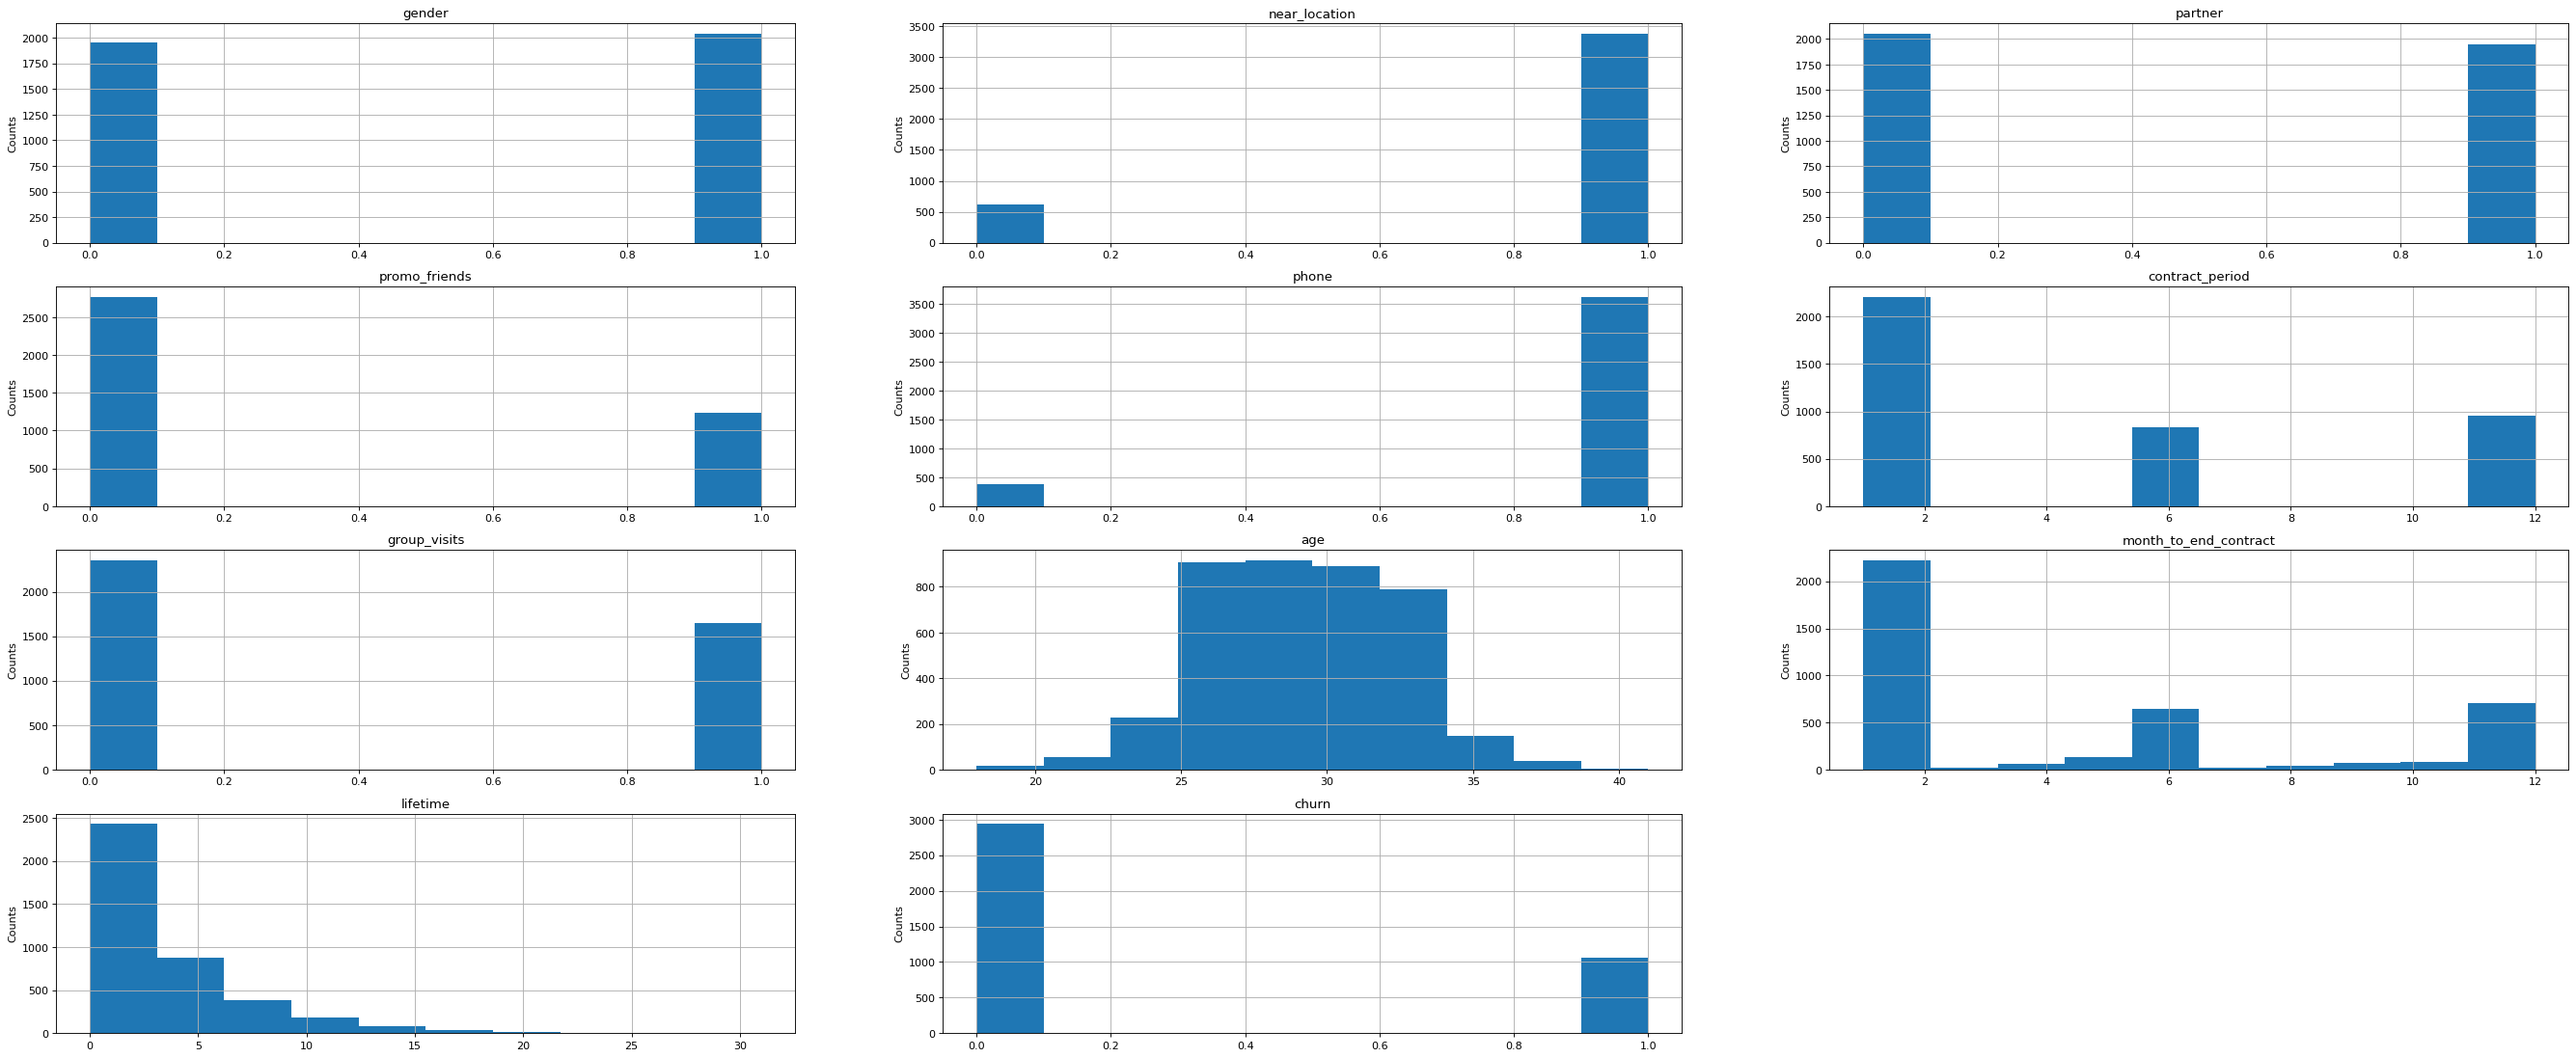

In [127]:
# general view of feature distributions
barplotsColumns(df, nLower = 1, nUpper = 1000)

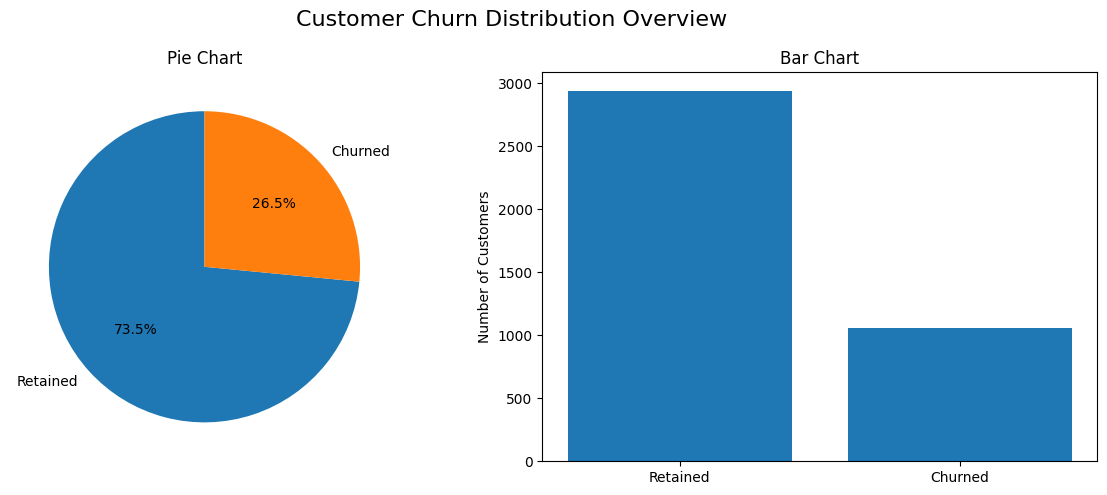

In [128]:
# Churn distribution
target = 'churn'
labels=['Retained', 'Churned']
churn_counts = df[target].value_counts()

# 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart
ax[0].pie(churn_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Pie Chart')

# Bar Chart
ax[1].bar(churn_counts.index, churn_counts.values)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(labels)
# ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Bar Chart')

# Better layout
fig.suptitle('Customer Churn Distribution Overview', fontsize=16)
plt.tight_layout()
plt.show()

## Correlation analysis

In [129]:
corr = df.corr(numeric_only=True)[target].sort_values()
corr

lifetime                            -0.438220
avg_class_frequency_current_month   -0.412348
age                                 -0.404735
contract_period                     -0.389984
month_to_end_contract               -0.381393
avg_class_frequency_total           -0.249715
avg_additional_charges_total        -0.198697
group_visits                        -0.175325
promo_friends                       -0.162233
partner                             -0.157986
near_location                       -0.128098
phone                               -0.001177
gender                               0.000708
churn                                1.000000
Name: churn, dtype: float64

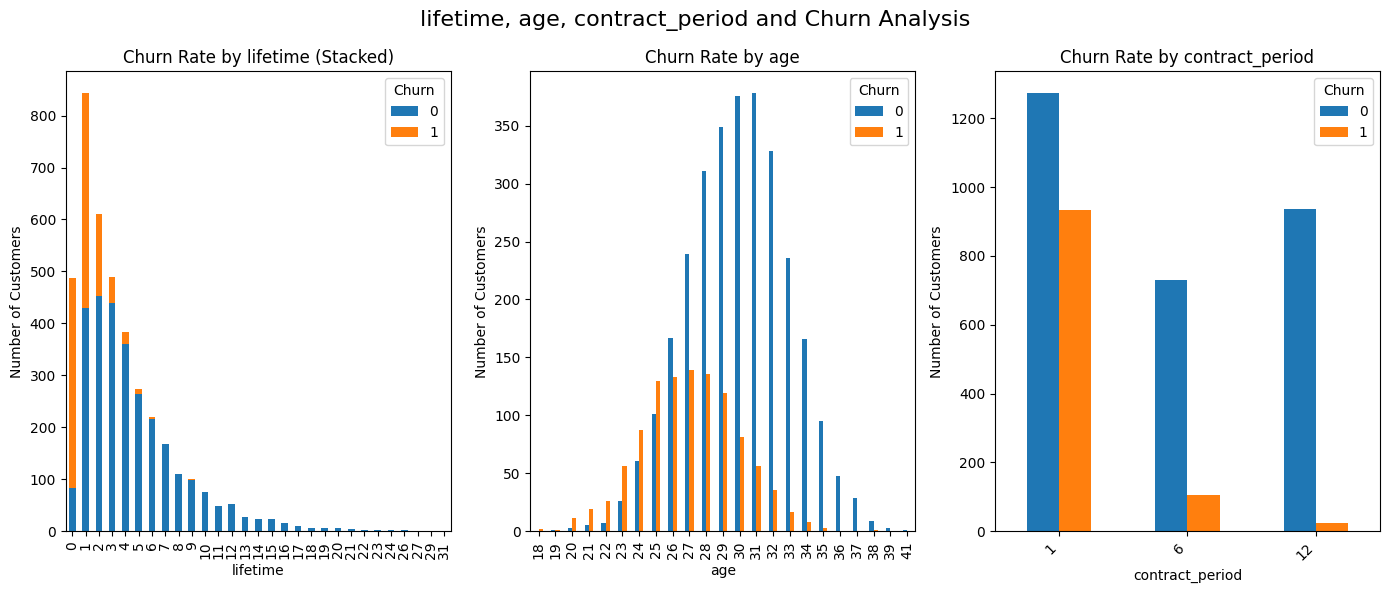

In [130]:
# Stacked Bar Chart: lifetime vs. Churn
lifetime_churn = df.groupby(['lifetime', target]).size().unstack()

# Stacked Bar Chart: age vs Churn
age_churn = df.groupby(['age', target]).size().unstack()

# Stacked Bar Chart: avg_class_frequency_current_month vs Churn
contract_period_churn = df.groupby(['contract_period', target]).size().unstack()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Stacked Bar Chart
lifetime_churn.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('lifetime')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Churn Rate by lifetime (Stacked)')
axes[0].legend(title='Churn', loc='upper right')

# Bar Chart
age_churn.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('age')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Churn Rate by age')
axes[1].legend(title='Churn', loc='upper right')
plt.xticks(rotation=45, ha='right')

contract_period_churn.plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('contract_period')
axes[2].set_ylabel('Number of Customers')
axes[2].set_title('Churn Rate by contract_period')
axes[2].legend(title='Churn', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Better layout
fig.suptitle('lifetime, age, contract_period and Churn Analysis', fontsize=16)
plt.tight_layout()
plt.show()

In [131]:
def plot_dist(data, target, feature):    
  ac_len_churned = data[data[target]==1][feature]
  ac_len_not_churned =data[data[target]==0][feature]
  sns.distplot(ac_len_churned,label='Churned')
  sns.distplot(ac_len_not_churned,label='Retained')
  plt.title(f'Distribution of {feature}')
  plt.legend()
  plt.show()

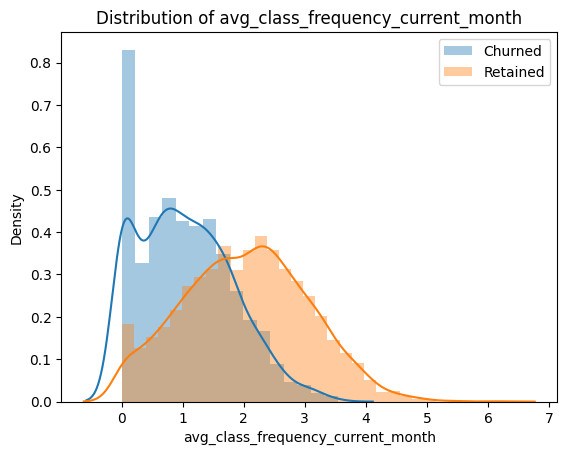

In [132]:
plot_dist(df, target, 'avg_class_frequency_current_month')

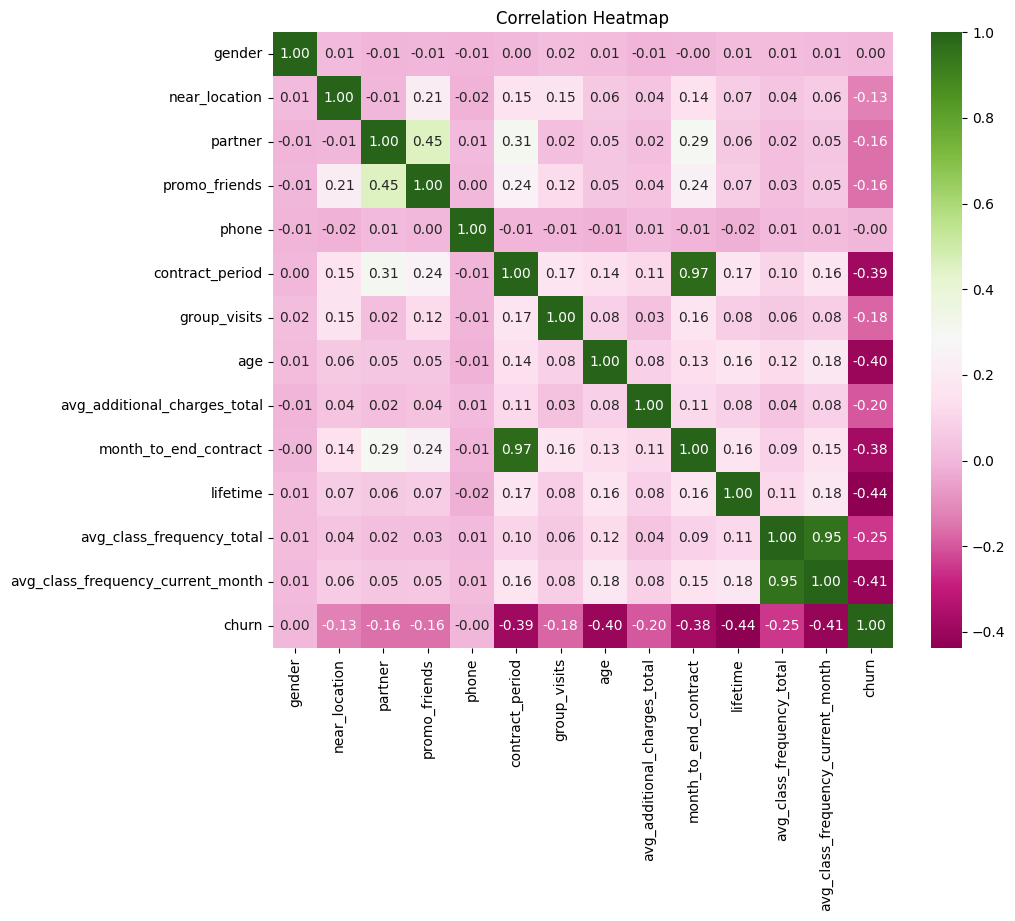

In [133]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Churn Prediction modeling

In [134]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [135]:
# 3 sets - training, validation, testing
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=777)
print(X_train.shape[0], X_val.shape[0], X_test.shape[0])

2400 800 800


In [136]:
def calculate_show_metrics(classifier, classifier_description, X_val, y_val):
    y_pred_val = classifier.predict(X_val)

    # metrics
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='binary')
    val_recall = recall_score(y_val, y_pred_val, average='binary')
    val_f1 = f1_score(y_val, y_pred_val, average='binary')

    print(f'{classifier_description}:')
    print(f' Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}')
    print(f' Accuracy: {val_accuracy:.4f}')
    print('')
    print(classification_report(y_val, y_pred_val))
    cm = confusion_matrix(y_val, y_pred_val)
    print(cm)
    return val_accuracy, val_precision, val_recall, val_f1

In [137]:
def calculate_show_roc_auc(classifier, classifier_description, X_val, y_val):
    # Get predicted probabilities for validation set
    y_pred_proba_val = classifier.predict_proba(X_val)[:, 1]

    # Calculate ROC curve for validation set
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)

    # Calculate AUC for validation set
    roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

    # Plot ROC curve for validation set
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_description}: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    return roc_auc_val

## **LogisticRegression**

In [138]:
lr_classifier = LogisticRegression(random_state=777)

lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=777)

In [139]:
calculate_show_metrics(lr_classifier, 'LR classifier Validation', X_val, y_val)

LR classifier Validation:
 Precision: 0.8729, Recall: 0.8144, F1 Score: 0.8427
 Accuracy: 0.9263

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       606
           1       0.87      0.81      0.84       194

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.93      0.93      0.93       800

[[583  23]
 [ 36 158]]


(0.92625, 0.8729281767955801, 0.8144329896907216, 0.8426666666666667)

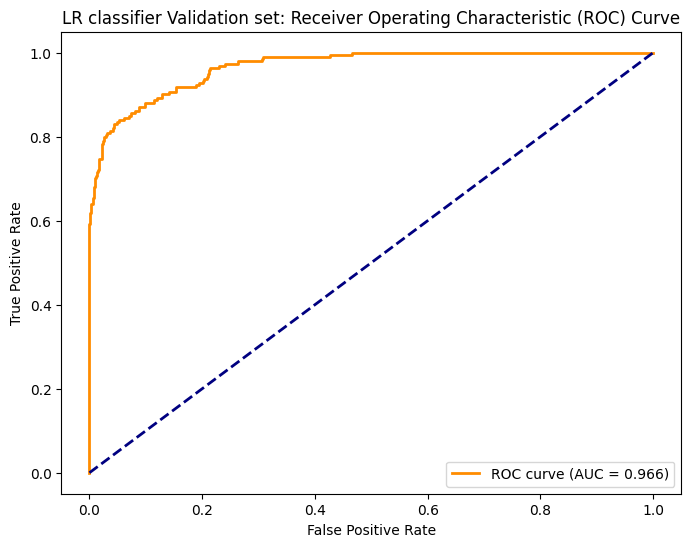

0.9664778333503454

In [140]:
calculate_show_roc_auc(lr_classifier, 'LR classifier Validation set', X_val, y_val)

### Hyper parameter tuning

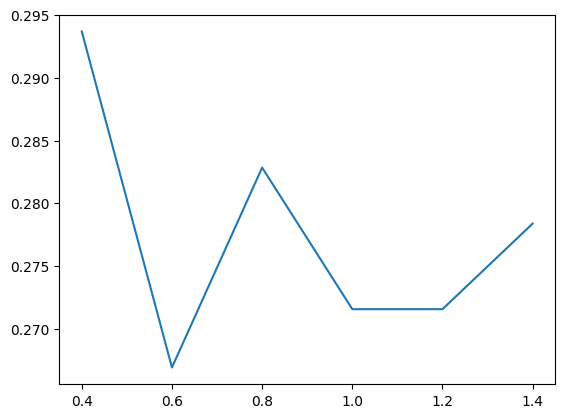

In [141]:
scores = []
for C in [0.4, 0.6, 0.8, 1.0, 1.2, 1.4]:
        lr = LogisticRegression(C=C, random_state=777)
        model = lr.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred_val)
        scores.append((C, rmse))

df_scores = pd.DataFrame(scores, columns=['C', 'rmse'])
plt.plot(df_scores.C, df_scores.rmse)
plt.show()

* default value of C=1.0 is NOT optimal for this case
* it's really interesting, for random_state=42 it is optimal, for random_state=777 - not

In [142]:
calculate_show_metrics(lr_classifier, 'LR classifier Validation', X_val, y_val)

LR classifier Validation:
 Precision: 0.8729, Recall: 0.8144, F1 Score: 0.8427
 Accuracy: 0.9263

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       606
           1       0.87      0.81      0.84       194

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.93      0.93      0.93       800

[[583  23]
 [ 36 158]]


(0.92625, 0.8729281767955801, 0.8144329896907216, 0.8426666666666667)

### Results of LogisticRegression on Testing Data

In [143]:
lr_accuracy, lr_precision, lr_recall, lr_f1 = calculate_show_metrics(lr_classifier, 'LR classifier Test', X_test, y_test)

LR classifier Test:
 Precision: 0.9187, Recall: 0.8000, F1 Score: 0.8552
 Accuracy: 0.9187

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       560
           1       0.92      0.80      0.86       240

    accuracy                           0.92       800
   macro avg       0.92      0.88      0.90       800
weighted avg       0.92      0.92      0.92       800

[[543  17]
 [ 48 192]]


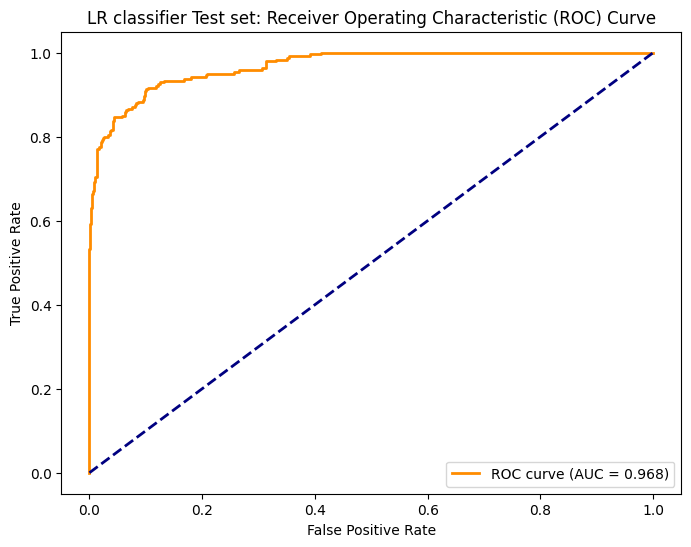

In [144]:
lr_roc_auc = calculate_show_roc_auc(lr_classifier, 'LR classifier Test set', X_test, y_test)

* indeed, tuned model is slightly better

LR classifier Tuned Test:
 Precision: 0.9282, Recall: 0.8083, F1 Score: 0.8641
 Accuracy: 0.9237

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       560
           1       0.93      0.81      0.86       240

    accuracy                           0.92       800
   macro avg       0.93      0.89      0.91       800
weighted avg       0.92      0.92      0.92       800

[[545  15]
 [ 46 194]]


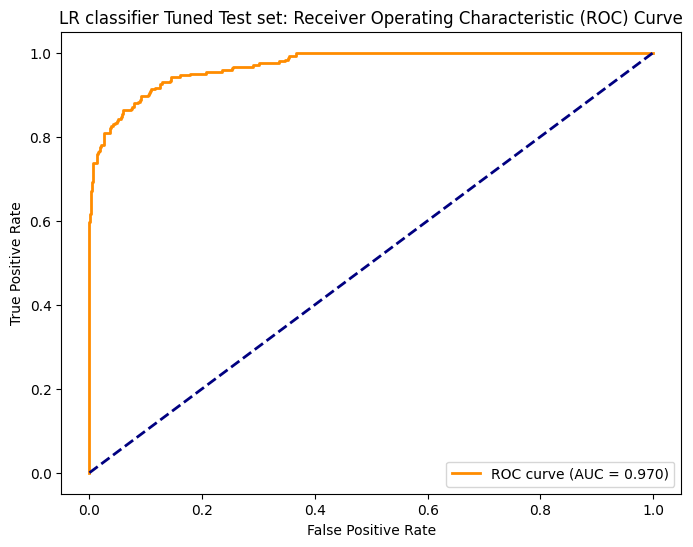

0.9703571428571428

In [145]:
lr_classifier_tuned = LogisticRegression(C=0.6, random_state=777)
lr_classifier_tuned.fit(X_train, y_train)
calculate_show_metrics(lr_classifier_tuned, 'LR classifier Tuned Test', X_test, y_test)
calculate_show_roc_auc(lr_classifier_tuned, 'LR classifier Tuned Test set', X_test, y_test)

## **RandomForestClassifier**

In [146]:
rf_classifier = RandomForestClassifier(random_state=777)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=777)

### Metrics on Validation Data

In [147]:
calculate_show_metrics(rf_classifier, 'RF classifier Validation', X_val, y_val)

RF classifier Validation:
 Precision: 0.8432, Recall: 0.8041, F1 Score: 0.8232
 Accuracy: 0.9163

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       606
           1       0.84      0.80      0.82       194

    accuracy                           0.92       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.92      0.92      0.92       800

[[577  29]
 [ 38 156]]


(0.91625, 0.8432432432432433, 0.8041237113402062, 0.8232189973614775)

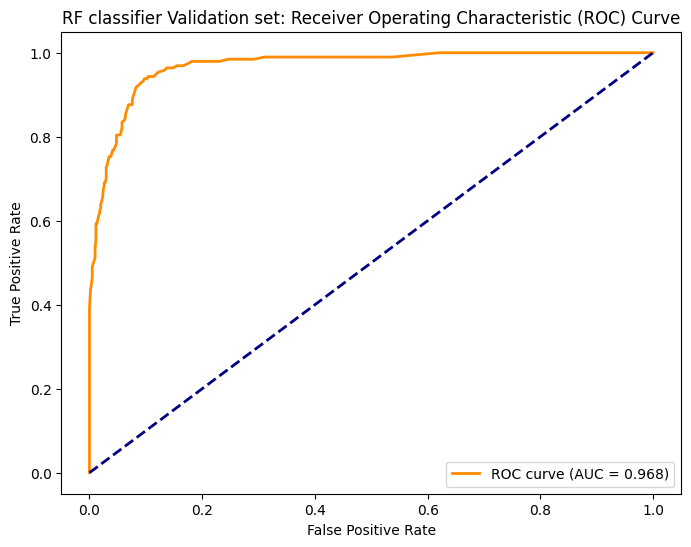

0.9684895035895342

In [148]:
calculate_show_roc_auc(rf_classifier, 'RF classifier Validation set', X_val, y_val)

### Hyper parameter tuning

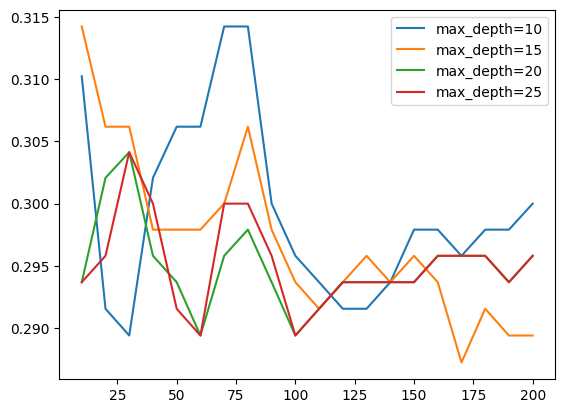

In [149]:
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, random_state=777, n_jobs=1, max_depth=d)
        model = rf.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred_val)
        scores.append((d, n, rmse))
        # print(d, n, round(rmse, 4))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'max_depth={d}')

plt.legend()
plt.show()

In [150]:
d = 25
n = 160
rf = RandomForestClassifier(n_estimators=n, random_state=777, n_jobs=1, max_depth=d)
model = rf.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred_val)
scores.append((d, n, rmse))
print(d, n, round(rmse, 3))

calculate_show_metrics(model, f'RF classifier Tuned {d} {n}', X_val, y_val)

25 160 0.296
RF classifier Tuned 25 160:
 Precision: 0.8407, Recall: 0.7887, F1 Score: 0.8138
 Accuracy: 0.9125

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       606
           1       0.84      0.79      0.81       194

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800

[[577  29]
 [ 41 153]]


(0.9125, 0.8406593406593407, 0.788659793814433, 0.8138297872340425)

### Results of RandomForestClassifier Tuned on Testing Data

In [151]:
calculate_show_metrics(model, f'RF classifier tuned Test', X_test, y_test)

RF classifier tuned Test:
 Precision: 0.8889, Recall: 0.8000, F1 Score: 0.8421
 Accuracy: 0.9100

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       560
           1       0.89      0.80      0.84       240

    accuracy                           0.91       800
   macro avg       0.90      0.88      0.89       800
weighted avg       0.91      0.91      0.91       800

[[536  24]
 [ 48 192]]


(0.91, 0.8888888888888888, 0.8, 0.8421052631578947)

* hmm, tuned model shows a bit worse metrics on Test set

In [152]:
rf_accuracy, rf_precision, rf_recall, rf_f1 = calculate_show_metrics(rf_classifier, f'RF classifier Test', X_test, y_test)

RF classifier Test:
 Precision: 0.8813, Recall: 0.8042, F1 Score: 0.8410
 Accuracy: 0.9087

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       560
           1       0.88      0.80      0.84       240

    accuracy                           0.91       800
   macro avg       0.90      0.88      0.89       800
weighted avg       0.91      0.91      0.91       800

[[534  26]
 [ 47 193]]


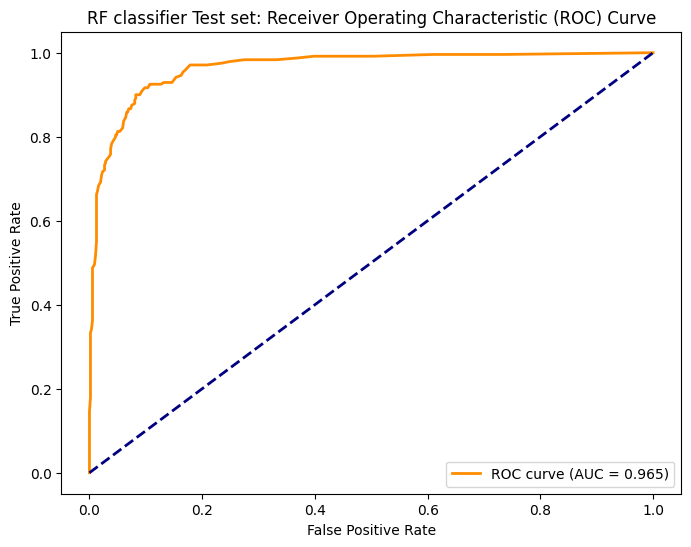

In [153]:
rf_roc_auc = calculate_show_roc_auc(rf_classifier, 'RF classifier Test set', X_test, y_test)

# **AdaBoostClassifier**

In [154]:
ada_classifier = AdaBoostClassifier(random_state=777)

ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=777)

## **AdaBoostClassifier on Validation Data**

In [155]:
calculate_show_metrics(ada_classifier, 'Ada classifier Validation', X_val, y_val)

Ada classifier Validation:
 Precision: 0.8083, Recall: 0.8041, F1 Score: 0.8062
 Accuracy: 0.9062

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       606
           1       0.81      0.80      0.81       194

    accuracy                           0.91       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.91      0.91      0.91       800

[[569  37]
 [ 38 156]]


(0.90625, 0.8082901554404145, 0.8041237113402062, 0.8062015503875969)

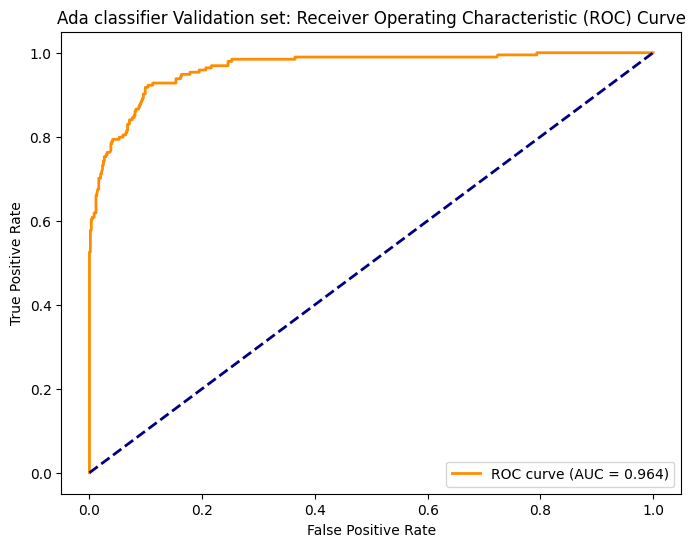

0.9639472967915348

In [156]:
calculate_show_roc_auc(ada_classifier, 'Ada classifier Validation set', X_val, y_val)

## **Results of AdaBoostClassifier on Testing Data**

In [157]:
ada_accuracy, ada_precision, ada_recall, ada_f1 = calculate_show_metrics(ada_classifier, f'Ada classifier Test', X_test, y_test)

Ada classifier Test:
 Precision: 0.8870, Recall: 0.8500, F1 Score: 0.8681
 Accuracy: 0.9225

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       560
           1       0.89      0.85      0.87       240

    accuracy                           0.92       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.92      0.92      0.92       800

[[534  26]
 [ 36 204]]


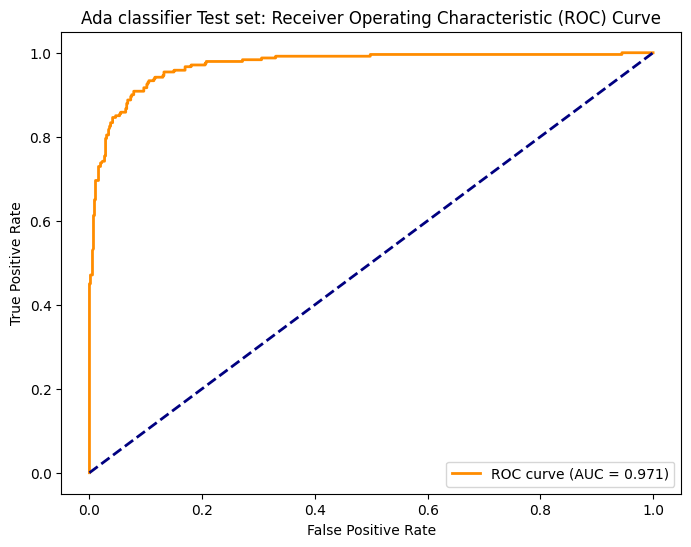

In [158]:
ada_roc_auc = calculate_show_roc_auc(ada_classifier, 'Ada classifier Test set', X_test, y_test)

# **Final comparison of metrics**

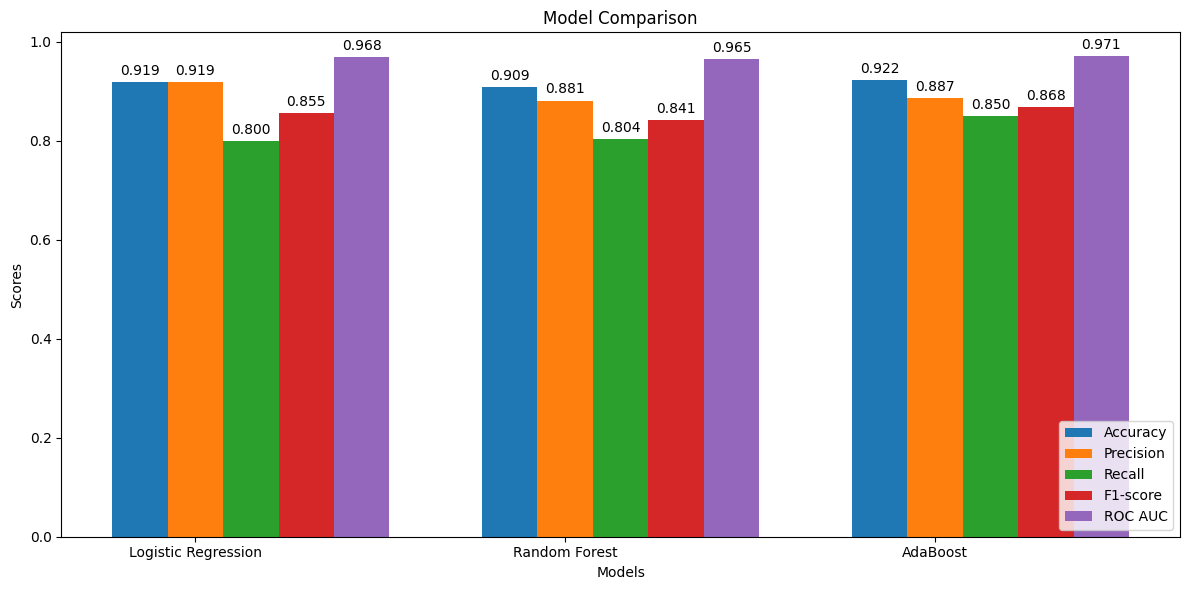

In [159]:
# Data for the bar chart
models = ['Logistic Regression', 'Random Forest', 'AdaBoost']
final_accuracy = [lr_accuracy, rf_accuracy, ada_accuracy]
final_precision = [lr_precision, rf_precision, ada_precision]
final_recall = [lr_recall, rf_recall, ada_recall]
final_f1_score = [lr_f1, rf_f1, ada_f1]
final_roc_auc = [lr_roc_auc, rf_roc_auc, ada_roc_auc]

bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(r1, final_accuracy, bar_width, label='Accuracy')
bars2 = ax.bar(r2, final_precision, bar_width, label='Precision')
bars3 = ax.bar(r3, final_recall, bar_width, label='Recall')
bars4 = ax.bar(r4, final_f1_score, bar_width, label='F1-score')
bars5 = ax.bar(r5, final_roc_auc, bar_width, label='ROC AUC')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)
ax.legend(loc='lower right')

# Add value labels on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)
autolabel(bars5)

# Display the chart
plt.tight_layout()
plt.show()